<a href="https://colab.research.google.com/github/Matus-Dubrava/ml_colab/blob/master/simple_GAN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

TensorFlow 2.x selected.


In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_train_full.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_test = y_train_full[:-5000], y_train_full[-5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
coding_size = 30
generator = keras.Sequential([
                              keras.layers.Dense(100, activation="selu", input_shape=[coding_size]),
                              keras.layers.Dense(150, activation="selu"),
                              keras.layers.Dense(28 * 28, activation="sigmoid"),
                              keras.layers.Reshape([28, 28])
])

discriminator = keras.Sequential([
                                  keras.layers.Flatten(input_shape=[28, 28]),
                                  keras.layers.Dense(150, activation="selu"),
                                  keras.layers.Dense(100, activation="selu"),
                                  keras.layers.Dense(1, activation="sigmoid")
])

gan = keras.Sequential([generator, discriminator])

In [0]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [0]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [0]:
def train_gan(gan, dataset, batch_size, coding_size, n_epochs=50):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    for X_batch in dataset:
      # training the discriminator
      noise = tf.random.normal(shape=[batch_size, coding_size])
      generated_images = generator(noise)
      X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_and_real, y1)
      # phase 2 - training the generator
      noise = tf.random.normal(shape=[batch_size, coding_size])
      y2 = tf.constant([[1.]] * batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise, y2)

In [0]:
train_gan(gan, dataset, batch_size, coding_size)

In [0]:
noise = tf.random.normal(shape=[batch_size, coding_size])

In [0]:
generated_images = generator(noise)

TensorShape([32, 28, 28])

In [0]:
def plot_generated_images():
  noise = tf.random.normal(shape=[batch_size, coding_size])
  generated_images = generator(noise)

  nrows = 4
  ncols = 8

  fig, ax = plt.subplots(figsize=(15, 11), nrows=nrows, ncols=ncols)

  for i in range(nrows):
    for j in range(ncols):
      ax[i][j].imshow(generated_images[i * 8 + j], cmap="binary")
      ax[i][j].get_xaxis().set_visible(False)
      ax[i][j].get_yaxis().set_visible(False)

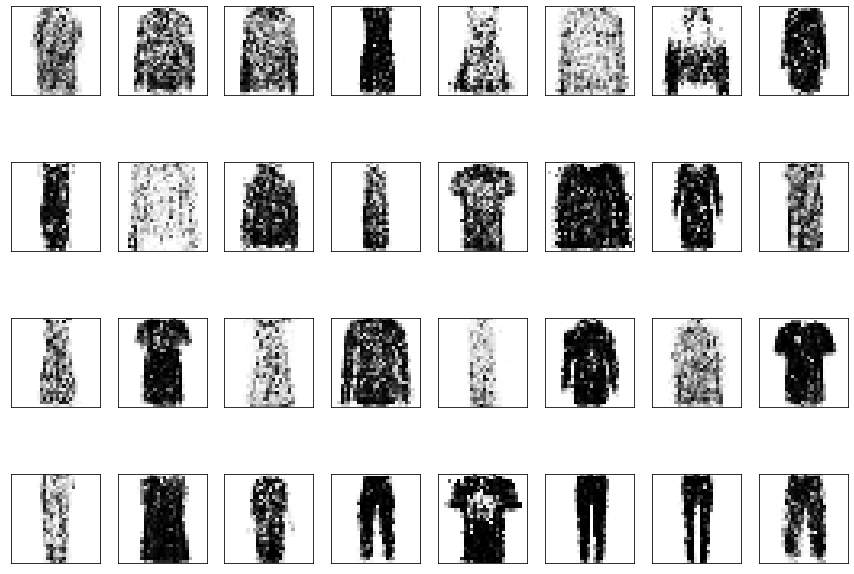

In [18]:
plot_generated_images()